In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris

data = load_iris()

In [3]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
features = data.data   
feature_names = data.feature_names

target = data.target
target_names = data.target_names

In [5]:
features[:10, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
features.shape

(150, 4)

In [7]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0, 0.5, 'sepal width')

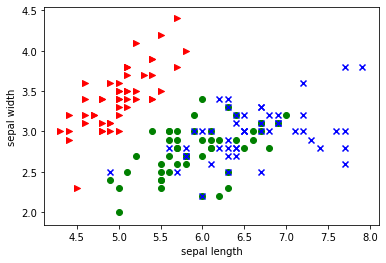

In [8]:
for t in range(3):
    if t == 0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker='o'
    elif t == 2:
        c='b'
        marker='x'
        
    plt.scatter(features[target == t, 0],   # sepal length
                features[target == t, 1],   # sepal width
                marker = marker,
                c = c)
plt.xlabel("sepal length")
plt.ylabel("sepal width")

Text(0, 0.5, 'petal width')

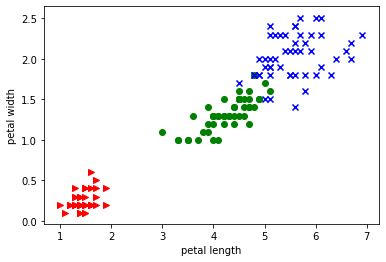

In [9]:
for t in range(3):
    if t == 0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker='o'
    elif t == 2:
        c='b'
        marker='x'
        
    plt.scatter(features[target == t, 2],   # petal length
                features[target == t, 3],   # petal width
                marker = marker,
                c = c)
plt.xlabel("petal length")
plt.ylabel("petal width")

Setosa의 경우 단순하게 petal length 또는 petal width 만으로 구분가능.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)


In [11]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [12]:
X_train[0]

array([5. , 2. , 3.5, 1. ])

아래 max_depth 를 바꾸어가며 결과를 관찰해보세요

In [13]:
from sklearn import tree
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [14]:
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [15]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_tr)))

Accuracy: 0.9778


In [16]:
iris_tree.predict([[1, 2, 3, 4]])

array([2])

아래 entropy 값이 어떻게 변하는지, 어떤 feature 로 구분을 먼저 시작하는지 유의하여 보세요.

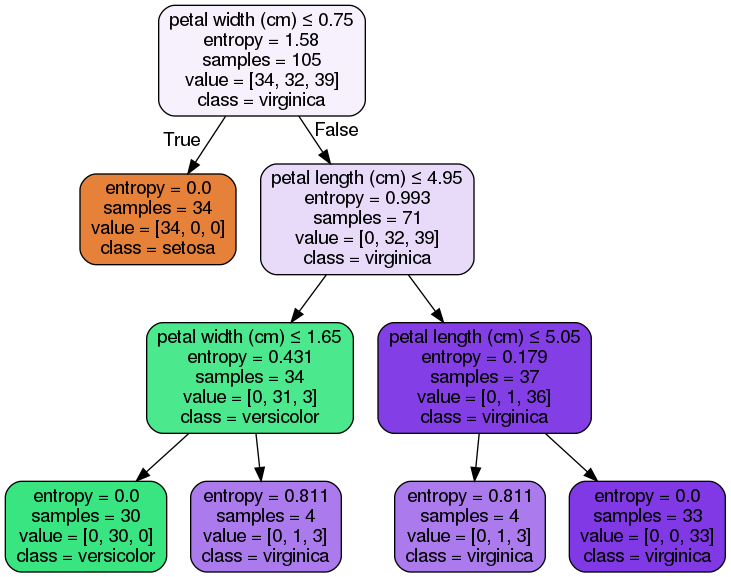

In [17]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=feature_names,
                          class_names=target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())